随机变量和概率分布是关于总体数据的模型 随机变量的值表示的是数据值

概率分布给出的是去数据值时所对应的概率或者一种用于计算数据各种取值的概率准则

离散型概率分布的两类表达形式 

1. 表格形式：其中一列是随机变量的值 第二列是随机变量取这些值时相应的概率 可用于分布分配概率   
2. 数学函数 计算随机变量取每种值的概率——二项分布 泊松分布 超几何分布

# 随机变量

随机变量：是对一个试验结果的数值描述，随机变量将每一个可能出现的试验结果赋予一个数值。根据取值可分为离散型或连续型：

- 离散型随机变量：可以取有限多个或无限可数多个值的随机变量
- 连续型随机变量：可以取某一区间或多个区间内任意值的随机变量

## 离散型概率分布

对于离散型随机变量 $x$，概率函数给出随机变量取每种值得概率，记作 $f(x)$。

建立离散型概率分布时 可以采用分配概率的方法：古典法、主观法、相对频率法。

离散型概率函数的基本条件：

$$f(x) \ge 0$$

$$\sum f(x) = 1$$

## 离散型均匀概率函数

$$\displaystyle f(x) = \frac{1}{n}$$

- 其中 $n$ 代表随机变量可能取值的个数

例如我们现在有一枚正常的六面骰子：
- 随机变量有 $n = 6$ 个可能值：$x = 1, 2, 3, 4, 5, 6$
- 离散型均匀概率函数 $\displaystyle f(x) = \frac{1}{6},\ x = 1, 2, 3, 4, 5, 6$

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli, binomtest, poisson, randint
from math import e, factorial
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

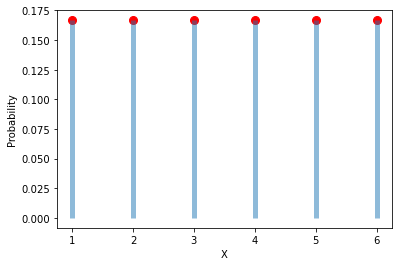

In [2]:
a, b=1, 6
x = np.arange(a, b+1)

discrete_uniform_distribution = randint(a, b+1)
discrete_uniform_pmf = discrete_uniform_distribution.pmf(x)

plt.plot(x, discrete_uniform_pmf, 'ro', ms=8)
plt.vlines(x, 0, discrete_uniform_pmf, lw=5, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

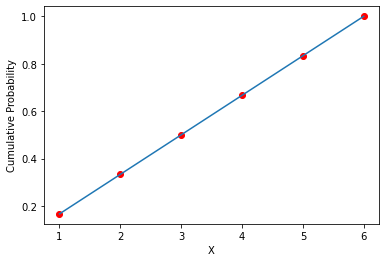

In [3]:
discrete_uniform_cdf = discrete_uniform_distribution.cdf(x)
plt.plot(x, discrete_uniform_cdf, 'ro')
plt.plot(x, discrete_uniform_cdf)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.show()

# 数学期望与方差

## 数学期望

随机变量的数学期望或均值是对随机变量中心位置的一种度量。离散型随机变量的数学期望：

$$E(x) = \mu = \sum{xf(x)}$$

数学期望是随机变量取值的**加权平均** 其中**权数是概率**。

假设我们现在有两列数据，第一列表示当天销售汽车的数量 ，第二列表示销售 $x$ 辆车的概率。
- 卖出 0 辆车的概率是 0.18
- 卖出 1 辆车的概率是 0.39
- $\cdots$

In [4]:
data = {'Sales':[0, 1, 2, 3, 4, 5], 'Prob':[0.18, 0.39, 0.24, 0.14, 0.04, 0.01]}
diCarlo = pd.DataFrame(data)
diCarlo

,Sales,Prob
0,0,0.18
1,1,0.39
2,2,0.24
3,3,0.14
4,4,0.04
5,5,0.01


In [5]:
salesExp = np.average(diCarlo['Sales'], weights=diCarlo['Prob'])

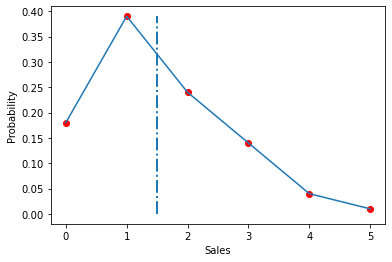

In [6]:
plt.plot(diCarlo['Sales'], diCarlo['Prob'], 'ro')
plt.plot(diCarlo['Sales'], diCarlo['Prob'])
plt.vlines(salesExp, 0, diCarlo['Prob'].max(), linestyles='-.', lw=2)
plt.xlabel('Sales')
plt.ylabel('Probability')
plt.show()

## 方差

数学期望是对于随机变量中心位置的度量，方差是对于随机变量的变异性或分散程度的描述。

随机变量的数学期望不一定是随机变量的某个值，方差是随机变量离差平方的加权算术平均，其中权数 $f(x)$ 是概率。

离散型随机变量的方差：

$$Var(x) = \sigma^2 = \sum{(x-\mu)^2f(x)}$$

标准差：

$$\sigma = \sqrt {Var(x)}$$

我们之前计算均值（期望值）的方法，不能直接用来计算离散型随机变量的均值。

In [7]:
diCarlo['SS'] = (diCarlo['Sales'] - salesExp)**2
np.average(diCarlo['SS'], weights=diCarlo['Prob'])

1.25

In [8]:
np.average(diCarlo['SS'], weights=diCarlo['Prob'])**0.5

1.118033988749895

# （暂时没想到好办法展示）二元分布 协方差和金融资产组合

二元分布：两个随机变量的概率分布。考虑二元分布概率分布的时候，构建一个二元试验是非常有用的。

在一个二元试验中， 每种试验结果由两个值构成 其中每个值与一个随机变量相对应
- 在一个抛掷一对色子的二元试验中，试验结果由两个值构成:其中一个是第一枚骰子的点数,另一个是第二枚骰子的点数
- 再比如观察金融市场上 一只股票基金和一只债券基金

## 二元经验离散型概率分布

随机变量$x$和$y$的协方差：

$$\sigma_{xy} = \frac {[Var(x+y) - Var(x) - Var(y)]} {2}$$

随机变量$x$和$y$的相关系数：

$$\rho_{xy} = \frac {\sigma_{xy}}{\sigma_x\sigma_y}$$

## 金融上的应用

随机变量 $x$ 和 $y$ 的线性组合的数学期望：

$$E(ax + by) = aE(x) + bE(y)$$

两个随机随机变量的线性组合的方差：

$$Var(ax+by) = a^2Var(x) + b^2Var(y) + 2ab\sigma_{xy}$$

收益与风险中寻求平衡 投资于资产组合优于单独投资于债券基金

## 小结

二元离散概率分布   协方差和相关系数这两种度量方法

如何计算随机变量的线性组合的数学期望和方差

金融资产组合是随机变量的线性组合  这是一种我们称为加权平均的特殊的线性组合

各个随机变量之间的协方差为负 减小了资产组合的方差 大部分降低资产组合风险的理论正是基于此而提出分散投资的

# 二项概率分布

## 伯努利过程

1. 每次试验有两种可能的结果 我们把其中一个称为成功 另一个称为失败
2. 每次试验成功的概率都是相同的，用 $p$ 来表示 失败的概率也是相同的 有 $1-p$ 来表示
3. 试验是相互独立的

最简单的伯努利过程就是抛硬币。下面我们可以模拟一个抛硬币的分布。假设这枚硬币的质地是不均匀的，有 30% 的概率是正面（记作 0），70% 的概率是反面（记作 1），分布是这样的：

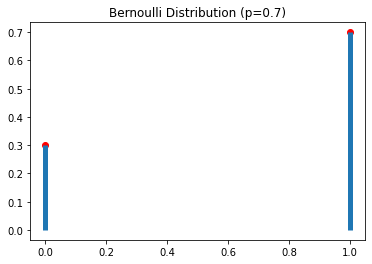

In [9]:
p = 0.7
x = np.arange(0, 2)

bernoulli_pmf = bernoulli.pmf(x, p)
plt.plot(x, bernoulli_pmf, 'ro')
plt.vlines(x, 0, bernoulli_pmf, linestyles='-', lw=5)
plt.title(f"Bernoulli Distribution (p={p})")
plt.show()

## 二项试验

二项试验具有以下四个性质：
1. 试验由一系列相同的 $n$ 个试验组成
2. 每次试验有两种可能的结果 我们把其中一个称为成功 另一个称为失败
3. 每次试验成功的概率都是相同的，用 $p$ 来表示 失败的概率也是相同的 有 $1-p$ 来表示
4. 试验是相互独立的

## 二项概率分布的简单应用

$n$ 次试验中恰有 $x$ 次成功的试验结果的个数：

$$\binom {n}{x} = \frac {n!}{x!(n-x)!}$$

在 $n$ 次试验中有 $x$ 次成功的特定试验结果的概率：

$$p^x(1-p)^{(n-x)}$$

二项概率函数

$$f(x) = \binom {n}{x} p^x(1-p)^{(n-x)}$$

其中：
- $x$ 为成功的次数
- $p$ 为一次试验中成功的概率
- $n$ 为试验的次数
- $f(x)$ 为 $n$ 次试验中有 $x$ 次成功的概率  

假设有 10 个顾客到店，每个顾客购物的概率都是 0.3，恰好有 4 名顾客购物的概率是？
- $x = 4$
- $p = 0.3$
- $n = 10$

$$$$

$$
\begin{aligned}
f(4) 
&= \binom {10}{4} \times 0.3^4 \times (1-0.3)^{(10-4)} \\
&= \frac {10!}{4!(10-4)!} \times 0.3^4 \times (0.7)^{(6)} \\
&= \frac {10!}{4!6!} \times 0.3^4 \times 0.7^{6} \\
&= 0.2001
\end{aligned}
$$

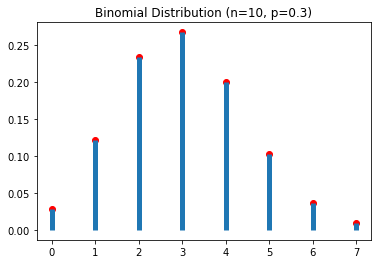

0.2001209489999999


In [10]:
n, p, k = 10, 0.3, 4

# 随机生成数组
x = np.arange(0, binom.ppf(0.999, n, p))
# x = np.arange(0, n+1)

binomial_pmf = binom.pmf(x, n, p)
plt.plot(x, binomial_pmf, 'ro')
plt.vlines(x, 0, binomial_pmf, linestyles='-', lw=5)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()
print(binomial_pmf[k])
#print(binomtest(k, n, p).pvalue)
#binomial_cdf = binom.cdf(x, n, p)
#plt.plot(x, binomial_cdf, marker='o')

## 二项分布的数学期望和方差

数学期望：
$$E(x) = \mu = np$$

假设有 1000 个顾客到店，每个顾客购物的概率都是 0.3，购物人数的数学期望值是：

$$E(x) = \mu = np = 1000 \times 0.3 = 300$$

方差：
$$Var(x) = \sigma ^2 = np(1-p)$$

购物人数的方差和标准差是：

$$Var(x) = \sigma ^2 = np(1-p) = 1000 \times 0.3 \times 0.7 = 210$$

$$SD = \sigma = \sqrt{np(1-p)} = \sqrt{1000 \times 0.3 \times 0.7} = 14.49$$

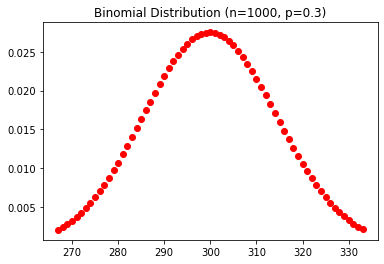

In [8]:
n, p = 1000, 0.3
# 随机生成数组
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
# x = np.arange(0, n+1)

binomial_pmf = binom.pmf(x, n, p)
plt.plot(x, binomial_pmf, 'ro')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

In [9]:
# 获取统计量
mean, var = binom.stats(n, p)
print(mean)
print(var**0.5)

300.0
14.491376746189438


# 泊松概率分布

主要用于估计在**特定时间段或空间中某事件发生的次数**

泊松试验的性质：
1. 在任意两个相等长度的区间上 事件发生的概率相等
2. 事件在某一区间上是否发生与事件在其他区间上是否发生是独立的

泊松分布概率函数：

$$f(x) = \frac {\mu^x e^{-\mu}}{x!}$$

- $f(x)$ 为事件在一个区间发生 $x$ 次的概率
- $\mu$ 为事件在一个区间发生次数的数学期望或均值
- 自然常数 $e=2.71828$

假设现在有一趟公交车，每个时间段上公交车到达的概率都是相等的，

并且我们通过对历史数据的分析显示，单位时间内，公交车平均会来 10 趟，

因此，单位时间内公交车的分布概率函数为：

$$f(x) = \frac {10^x \times e^{-10}}{x!}$$

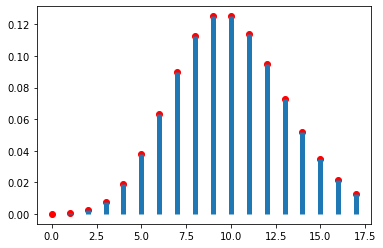

In [14]:
mu = 10
# 左边的区间需要取 0 ，否则会影响后面的统计量计算
x = np.arange(0, poisson.ppf(0.99, mu))

poisson_pmf = poisson.pmf(x, mu)

plt.plot(x, poisson_pmf, 'ro')
plt.vlines(x, 0, poisson_pmf, linestyles='-', lw=5, label='frozen pmf')
plt.show()

单位时间内恰好有 5 趟车到达的概率：

$$f(5) = \frac {10^5 \times e^{-10}}{5!} = 0.0378$$

In [15]:
k = 5
#print((mu**k * e**-mu)/factorial(k))
poisson_pmf[k]

0.03783327480207079

In [16]:
mean, var = poisson.stats(mu)
print(mean)
print(var)
print(var**0.5)

10.0
10.0
3.1622776601683795


现在已知，单位时间为 1 刻钟（15 分钟），已经知道每 15 分钟，公交车平均会来 10 趟，可以推算出，每 3 分钟，公交车平均会来 $\frac{10}{15} \times 3 = 2$ 趟

每 3 分钟公交车的分布概率函数为（注意，和前面 15 分钟的区别在于期望值 $\mu$）：

$$f(x) = \frac {2^x \times e^{-2}}{x!}$$

3 分钟内恰好有 1 趟车到达的概率：

$$f(1) = \frac {2^1 \times e^{-2}}{1!} = 0.2707$$

In [ ]:
x = np.arange(0, poisson.ppf(0.99, 2))
poisson.pmf(x, 2)[1]

# 泊松分布与二项分布的概率分布对比

下面确认泊松分布与二项分布的关系。对比试验次数为 100 000 000 次、成功概率为 0.000 000 02 的二项分布与强度为 2 的泊松分布的概率质量函数的图形（图6-3），可见二者基本一致。

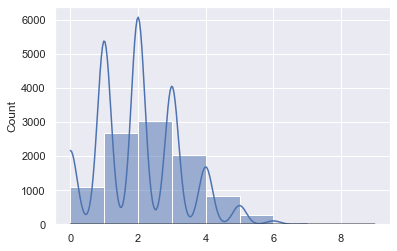

In [24]:
# 二项分布的概率质量函数
binom.pmf(k = 1, n = 2, p = 0.5)
# 从 N = 10, p = 0.5 的二项分布中生成随机数
np.random.seed(1)
binom.rvs(n = 10, p = 0.2, size = 5)
# N = 10, p = 0.2 的二项分布
binomial = binom(n = 10, p = 0.2)

# 生成随机数
np.random.seed(1)
rvs_binomial = binomial.rvs(size = 10000)

# 概率质量函数
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k = m)

# 绘制出样本直方图与概率质量函数
sns.histplot(rvs_binomial, bins = m, kde = True)
plt.plot(m, pmf_binomial, color = 'black')

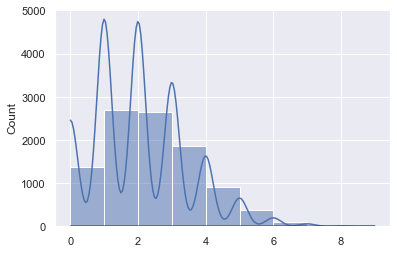

In [23]:
# 泊松分布的概率质量函数
poisson.pmf(k = 2, mu = 5)

# 从 λ = 2 的泊松分布中生成随机数
np.random.seed(1)
poisson.rvs(mu = 2, size = 5)

# λ = 2 的泊松分布
poisson = poisson(mu = 2)

# 生成随机数
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)

# 概率质量函数
pmf_poisson = poisson.pmf(k = m)

# 绘制样本直方图与概率质量函数
sns.histplot(rvs_poisson, bins = m, kde = True)
plt.plot(m, pmf_poisson, color = 'black')

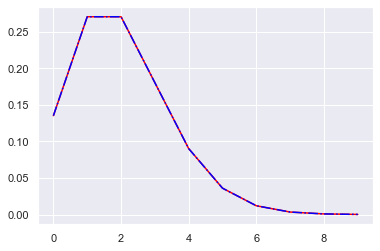

In [31]:
# N 非常大但 p 非常小的二项分布
N = 100000000
p = 0.00000002
binomial_2 = binom(n = N, p = p)

# 概率质量函数
pmf_binomial_2 = binomial_2.pmf(k = m)

# 绘制概率质量函数
plt.plot(m, pmf_poisson, color = 'red')
plt.plot(m, pmf_binomial_2, color = 'blue', 
         linestyle = '-.')

# 超几何概率分布（略）

超几何概率分布与二项概率分布练习密切

不同之处在于：超几何概率分布中的各项试验不是独立的 各次试验中成功的概率不等

## 超几何概率函数

$ f(x) = \frac{\lgroup^r_x\rgroup \lgroup^{N-r}_{n-x}\rgroup}{\lgroup ^N _n \rgroup} $

$x$为成功的次数 $n$为试验的次数 $f(x)$为$n$次试验中$x$次成功的概率，$N$为总体中元素个数 $r$为总体中具有成功标志的元素的个数

## 超几何分布的均值和方差

均值：$ E(x) = \mu = n \lgroup \frac {r}{N} \rgroup $

方差： $Var(x) = \sigma^2 = n\lgroup \frac{r}{N}\rgroup(1-\frac {r}{N})(\frac {N-n}{N-1}) $

